# Predictions based on first vector V1

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* B365H
* B365D
* B365A

* buildUpPlaySpeed
* buildUpPlayPassing
* chanceCreationShooting
* defencePressure
* buildUpPlayDribbling
* chanceCreationPassing
* chanceCreationCrossing
* defenceAggression
* defenceTeamWidth


In [2]:
match2 = pd.read_csv('learning_vectors/v01/version01-bet365FIFA.csv', sep=',')
match2 = match2.set_index(['Match_id'])

match2 = match2.sort_values(['League_id', 'Date'])
match2.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
                  'B365H', 'B365D', 'B365A',
                  'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                  'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']
match2.head()


,League_id,Season,Stage,Date,H_team,A_team,Result,B365H,B365D,B365A,...,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth
Match_id,,,,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,1.20,6.5,15.00,...,40,50,65,40,55,70,70,70,70,70
1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,5.50,3.6,1.67,...,70,35,50,35,70,40,50,60,60,40
1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,1.91,3.4,4.20,...,70,30,70,70,50,35,70,70,70,35
1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,2.00,3.3,4.00,...,70,40,55,70,55,45,60,70,70,45
1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,3.20,3.4,2.25,...,70,30,70,50,50,50,50,65,50,50


In [3]:
#Check for nulls
print(match2.isnull().sum())
match2.isnull().any().any()


League_id     0
Season        0
Stage         0
Date          0
H_team        0
A_team        0
Result        0
B365H         0
B365D         0
B365A         0
H_Speed       0
H_Pass        0
H_Shoot       0
H_Pressure    0
H_chPass      0
H_chCross     0
H_dAggr       0
H_dWidth      0
A_Speed       0
A_Pass        0
A_Shoot       0
A_Pressure    0
A_chPass      0
A_chCross     0
A_dAggr       0
A_dWidth      0
dtype: int64


False

## Different algorithms comparison

Alg/res.mean/res.std
LR: 0.544243 (0.010164)
LDA: 0.536020 (0.010260)
KNN: 0.466776 (0.009585)
CART: 0.429276 (0.007407)
NB: 0.451645 (0.022069)
SVM: 0.468421 (0.006048)


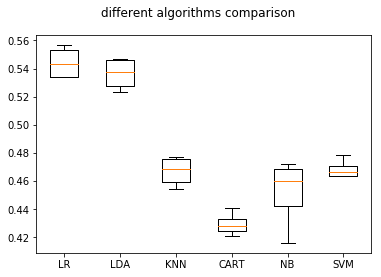

In [4]:
predictors = ['B365H', 'B365D', 'B365A',
              'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure',
              'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
              'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure',
              'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Alg/res.mean/res.std
LR: 0.541776 (0.014251)
LDA: 0.539474 (0.007826)
KNN: 0.461678 (0.021366)
CART: 0.441776 (0.013038)
NB: 0.452632 (0.016624)
SVM: 0.464967 (0.008391)


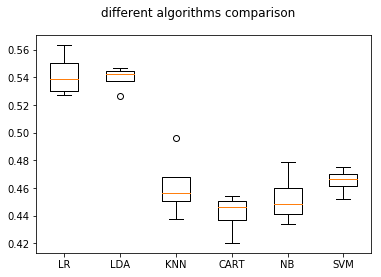

In [5]:
predictors2 = ['B365H', 'B365D', 'B365A']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Alg/res.mean/res.std
LR: 0.480592 (0.009697)
LDA: 0.480592 (0.008037)
KNN: 0.465461 (0.005611)
CART: 0.435691 (0.013526)
NB: 0.471875 (0.009273)
SVM: 0.468914 (0.007346)


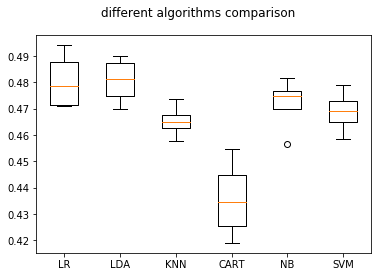

In [6]:
predictors = ['H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure',
              'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
              'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure',
              'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
